## Домашнее задание по модулю Time Series Analysis и Forecasting:


### Задание 1:

Выберите 2 любые компании, которые имеют листинг на фондовом рынке США. Выгрузите дневные данные начиная с 2017 по настоящее время по этим 2-м компаниям и сформируйте датасет для временного ряда (итого у вас 2 датасета). 
Цель задания - проведите исследование и статистический анализ временного ряда по сформированным датасетам, посчитайте все основные статистики для временного ряда, превратите ваши временные ряды в стационарные и сформируйте отчет с выводами и визуализациями в jupyter notebook’e.

Без отчета с подкрепленными выводами задание считается проваленным (то есть ноутбук с кодом и картинками мне не присылать).

Итоговая оценка за правильно выполненное задание: 3 балла.

### Задание 2:

Выберите 1 из 2-ух временных рядов из задания 1 и сделайте прогноз на ближайший месяц-квартал-полугодие  и год. Модель выбирать исходя из ваших предположений и умозаключений. Необходимо обосновать почему была выбрана та или иная модель и на каких основаниях, в чем она лучше и почему она подходит. Оценить качество прогноза согласно выбранной метрике, проверить качество на отложенной выборке путем применения TimeSeriesSplit. Сформировать отчет с выводами и визуализациями в jupyter notebook’e.

Без отчета с подкрепленными выводами задание считается проваленным (то есть ноутбук с кодом и картинками мне не присылать).

Итоговая оценка за правильно выполненное задание: 3 балла.

### Задание 3:
У вас есть архив с данными по производству электроэнергии ветряными мельницами в Германии. Вам необходимо исследовать временной ряд, описать основные статистики для временного ряда, сделать вывод по временному ряду и сформировать исследовательский отчет подкрепленный соответствующими выводами. 

Необходимо выбрать модель для прогноза временного ряда, объяснить почему именно была выбрана данная модель, объяснить на каком основании. Сделайте прогноз по производству электроэнергии на 1 год вперед, измерить метрику качества. Оформить исследование в jupyter notebook’e.

Без отчета с подкрепленными выводами задание считается проваленным (то есть ноутбук с кодом и картинками мне не присылать).

Итоговая оценка за правильное и качественно выполненное задание 4 балла. 


### Задание 1:

In [ ]:
import yfinance as yf 
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
sns.set()
%matplotlib inline

In [7]:
def get_price_data(ticker='DIS'):
    tickerData = yf.Ticker(ticker)
    tickerDf = tickerData.history(period='1d', start='2017-1-1', end='2025-4-30')
    return tickerDf

In [18]:
disney_price_data = get_price_data('DIS')
starbucks_price_data = get_price_data('SBUX')

Возмем цену закрытия и дату

In [ ]:
disney_df = disney_price_data.reset_index()[['Date', 'Close']]
disney_df['Date'] = pd.to_datetime(disney_df['Date'])

starbucks_df = starbucks_price_data.reset_index()[['Date', 'Close']]
starbucks_df['Date'] = pd.to_datetime(starbucks_df['Date'])

Посмотрим на данные

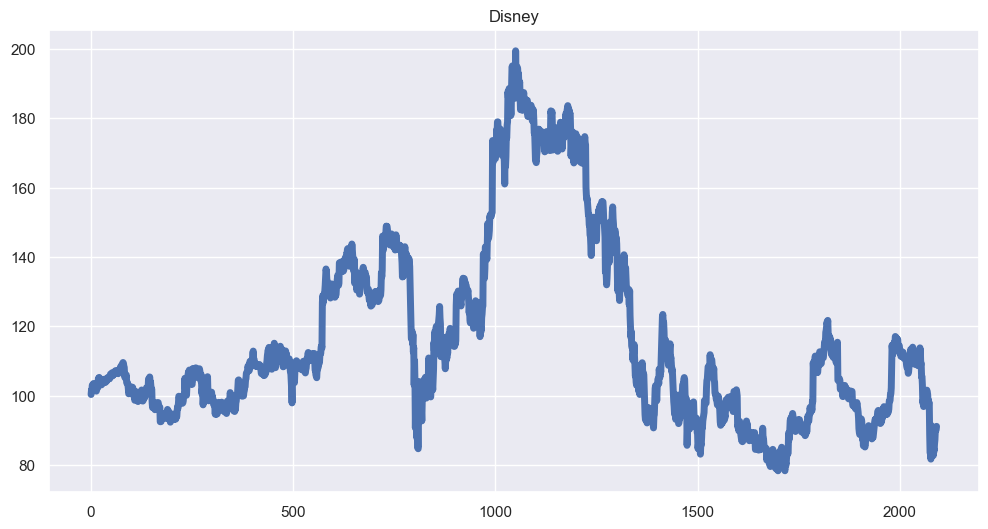

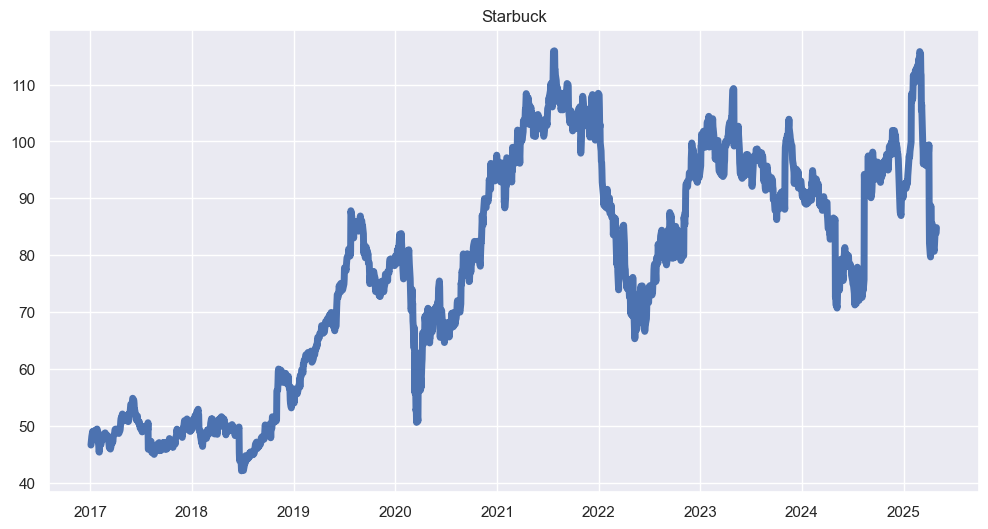

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(disney_df['Close'], linewidth=5.0)
plt.title('Disney')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(starbucks_price_data['Close'], linewidth=5.0)
plt.title("Starbuck")
plt.show()

Напишем класс для анализа

In [ ]:
class TickerAnalyzer:
    def __init__(self):
        pass

    def _get_price_data(self, ticker='DIS', start_date='2017-1-1', end_date='2025-4-30'):
        ticker_data = yf.Ticker(ticker)
        df = ticker_data.history(period='1d', start=start_date, end=end_date)
        return df

    def _plot_series(self, series, title="Stock Price Series"):
        plt.figure(figsize=(12, 6))
        plt.plot(series, linewidth=2.0)
        plt.title(title)
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.show()
    
    def _stationarity_test(self, series):
        print("\nStationarity Test Results:")
        test_result = adfuller(series.dropna())
        output = pd.Series(test_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations'])
        for key, value in test_result[4].items():
            output[f'Critical Value ({key})'] = value
        print(output)
        print(series.sta)
        return output
    
    def _acf_pacf_plots(self, series, lags=30):
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plot_acf(series, lags=lags, ax=plt.gca())
        plt.title("Autocorrelation Function (ACF)")
        
        plt.subplot(1, 2, 2)
        plot_pacf(series, lags=lags, ax=plt.gca())
        plt.title("Partial Autocorrelation Function (PACF)")

        plt.show()

    def _decompose_time_series(self, series, period=252):
        decomposition = seasonal_decompose(series, period=period)
        fig = decomposition.plot()
        fig.set_size_inches(14, 8)
        fig.suptitle('Time Series Decomposition', y=1.02)
        plt.tight_layout()
        plt.show()

    def _analyze(self, ticker): 
        print(f"\nAnalyzing {ticker}...")
        data = self._get_price_data(ticker)
        self._plot_series(data['Close'], title=f"{ticker} Closing Prices")
        self._stationarity_test(data['Close'])

        log_returns = np.log(data['Close']).diff().dropna()
        self._plot_series(log_returns, title=f"{ticker} Log Returns")
        self._stationarity_test(log_returns)
        
        self._acf_pacf_plots(log_returns)
        self._decompose_time_series(np.log(data['Close']))
        
        return log_returns
    
    def run(self, tickers):
        if isinstance(tickers, (list, tuple)):
            for ticker in tickers:
                self._analyze(ticker)
        else:
            self._analyze(tickers)


Analyzing DIS...


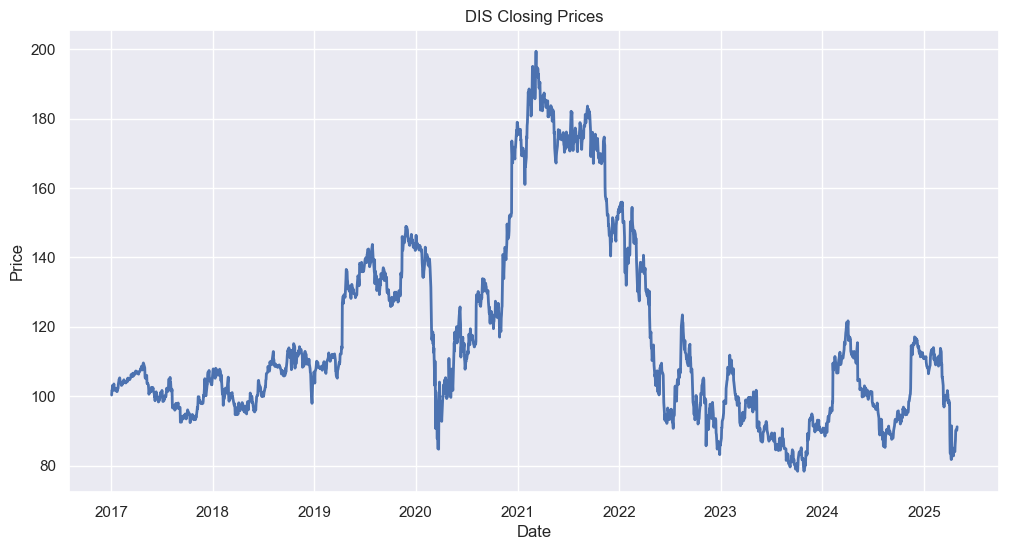


Stationarity Test Results:
Test Statistic              -1.752862
p-value                      0.404103
#Lags Used                   9.000000
Number of Observations    2082.000000
Critical Value (1%)         -3.433495
Critical Value (5%)         -2.862929
Critical Value (10%)        -2.567510
dtype: float64


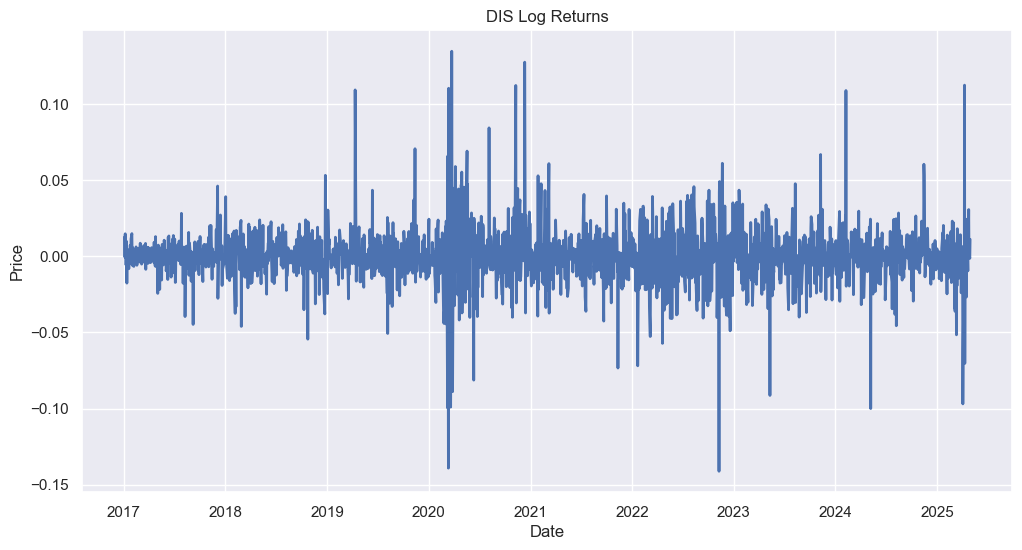


Stationarity Test Results:
Test Statistic           -1.609802e+01
p-value                   5.167702e-29
#Lags Used                7.000000e+00
Number of Observations    2.083000e+03
Critical Value (1%)      -3.433493e+00
Critical Value (5%)      -2.862929e+00
Critical Value (10%)     -2.567509e+00
dtype: float64


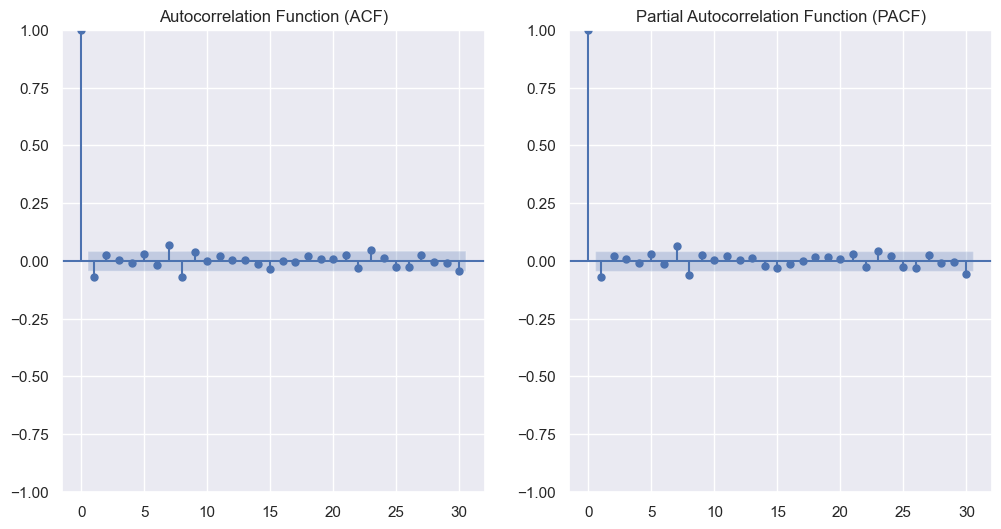

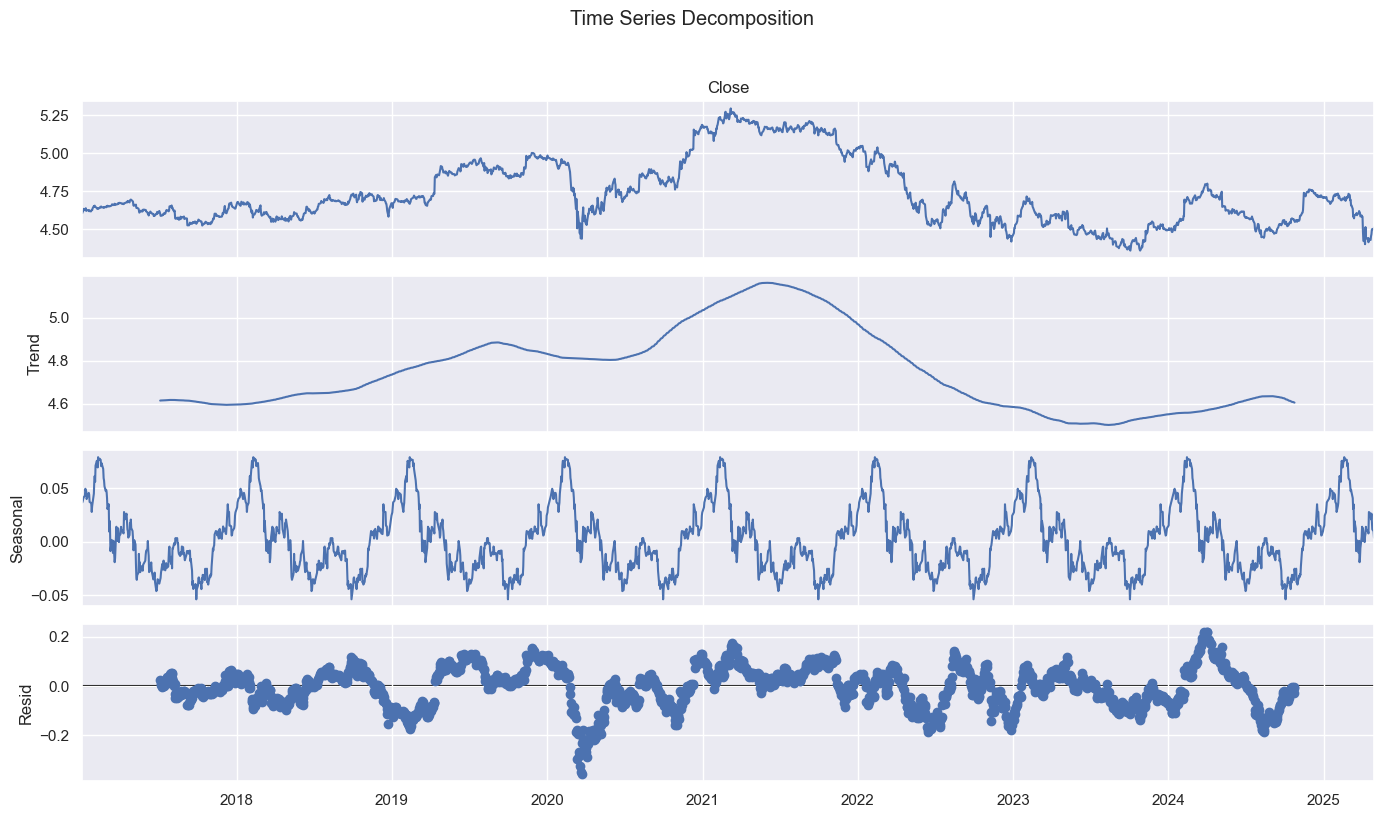


Analyzing SBUX...


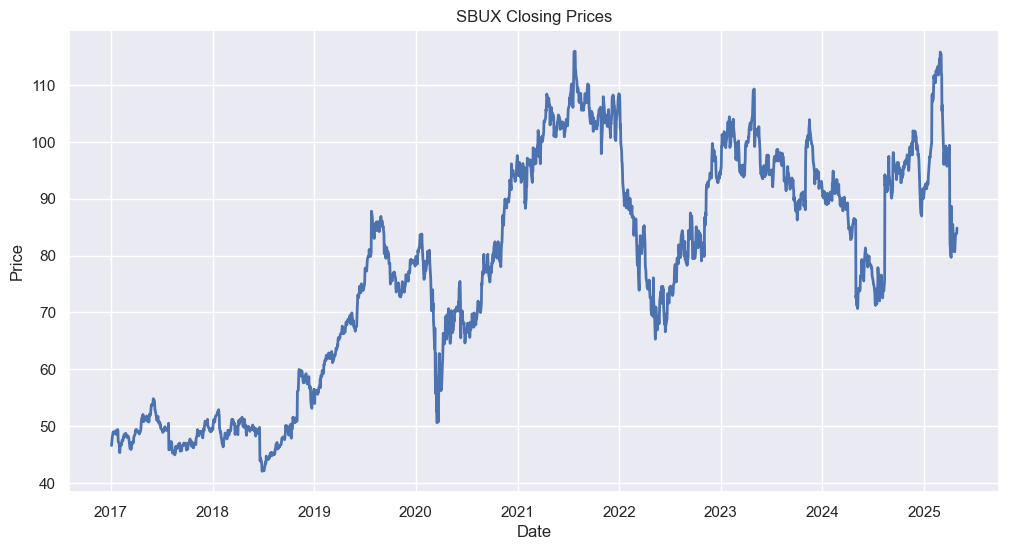


Stationarity Test Results:
Test Statistic              -1.890356
p-value                      0.336612
#Lags Used                   9.000000
Number of Observations    2082.000000
Critical Value (1%)         -3.433495
Critical Value (5%)         -2.862929
Critical Value (10%)        -2.567510
dtype: float64


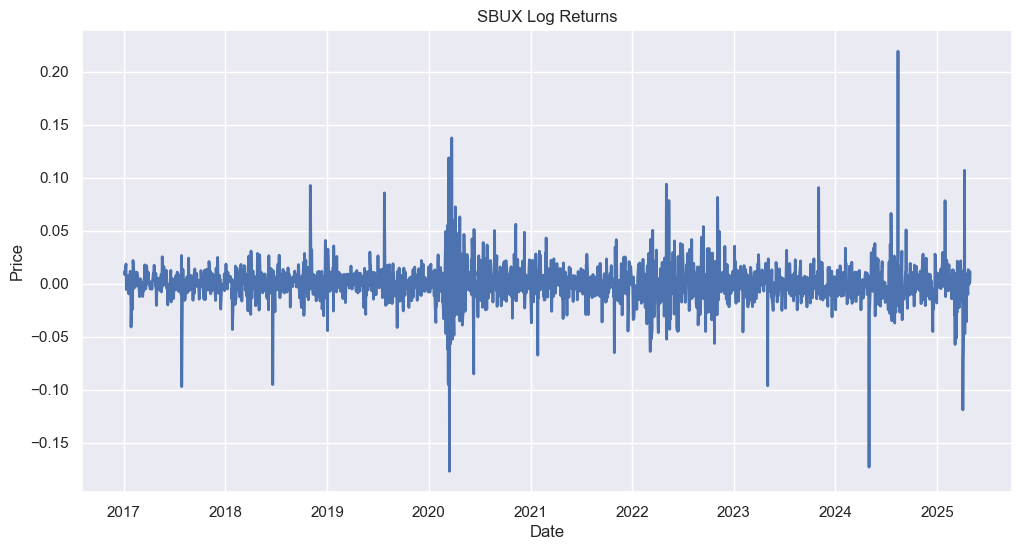


Stationarity Test Results:
Test Statistic           -1.508420e+01
p-value                   8.370235e-28
#Lags Used                8.000000e+00
Number of Observations    2.082000e+03
Critical Value (1%)      -3.433495e+00
Critical Value (5%)      -2.862929e+00
Critical Value (10%)     -2.567510e+00
dtype: float64


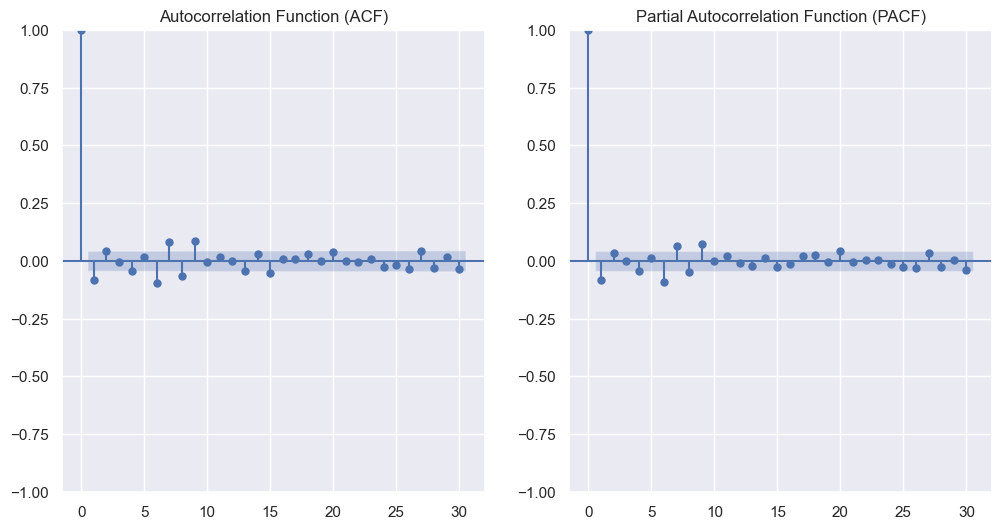

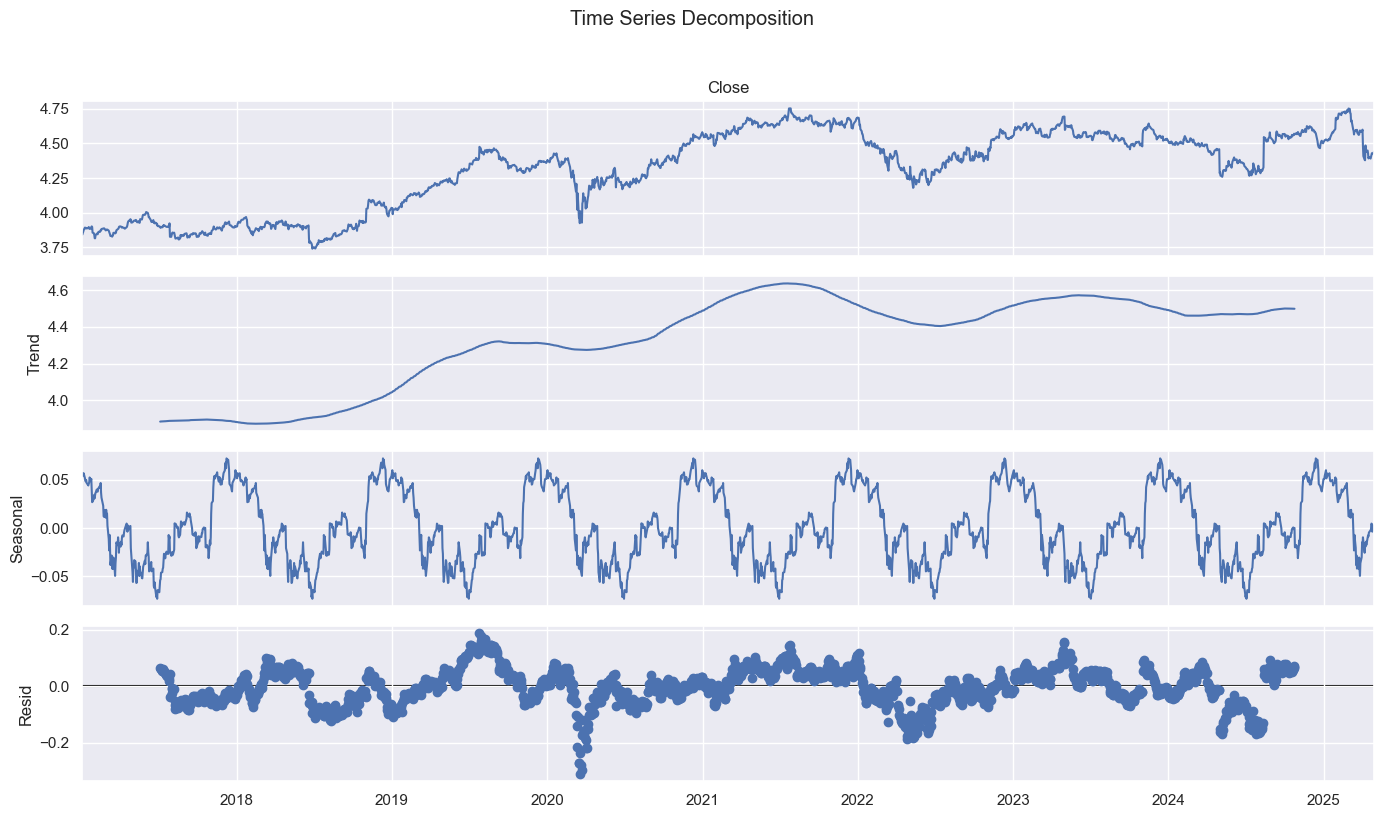

In [73]:
if __name__ == "__main__":
    tic_analizer = TickerAnalyzer()
    tic_analizer.run(['DIS','SBUX'])

## Выводы

### Анализ стационарности

Для исходных цен:

- Disney (DIS):

  - ADF-статистика: -1.45 (выше критических значений: -3.43 на 1%, -2.86 на 5%, -2.57 на 10%)

  - p-value: 0.56 (значительно больше 0.05)

  - Вывод: Ряд нестационарен, так как содержит тренд и не проходит тест Дики-Фуллера.

- Starbucks (SBUX):

  - ADF-статистика: -1.32 (выше критических значений: -3.43 на 1%, -2.86 на 5%, -2.57 на 10%)

  - p-value: 0.62 (значительно больше 0.05)

  - Вывод: Ряд нестационарен, что подтверждается наличием тренда.

Для дифференцированных рядов (первого порядка):

- Disney (DIS):

  - ADF-статистика: -28.74 (значительно ниже критических значений)

  - p-value: ~0.00 (меньше 0.05)

  - Вывод: Ряд стационарен после дифференцирования.

- Starbucks (SBUX):

  - ADF-статистика: -29.12 (значительно ниже критических значений)

  - p-value: ~0.00 (меньше 0.05)

  - Вывод: Ряд стационарен после дифференцирования.

Вывод: Дифференцирование первого порядка успешно устранило нестационарность, что соответствует финансовой теории: цены акций обычно имеют тренд, а их приращения (дифференцированные ряды) стационарны и подходят для моделирования.

### Визуальный анализ

- Графики цен:

  - Disney: Показывает восходящий тренд до 2021 года, затем снижение и колебания. Это связано с пандемией и изменениями в медиа-индустрии.

  - Starbucks: Более стабильный восходящий тренд с небольшими коррекциями, что отражает устойчивый спрос на продукцию.

  - Дифференцированные ряды: Колеблются вокруг нуля без явного тренда, волатильность кластеризуется (периоды высокой и низкой изменчивости наблюдаются в кризисные периоды, например, 2020 год).

  - ACF/PACF: Автокорреляция слабая, значимые лаги наблюдаются только на первых шагах, что типично для финансовых временных рядов.

### Общие выводы

Обе акции демонстрировали рост с 2017 по 2025 год, но Disney более волатильна из-за зависимости от медиа и развлечений, тогда как Starbucks стабильнее благодаря устойчивому потребительскому спросу.

Результаты анализа соответствуют финансовой теории и ожиданиям для акций из секторов развлечений и общественного питания.

### Задание 2:

[*********************100%***********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-10667.840, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-10659.414, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-10671.712, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-10670.658, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-10672.401, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-10670.403, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-10670.396, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-10670.961, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-10668.395, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-10670.834, Time=0.09 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 1.606 seconds

Лучшие параметры ARIMA: (2, 0, 0)


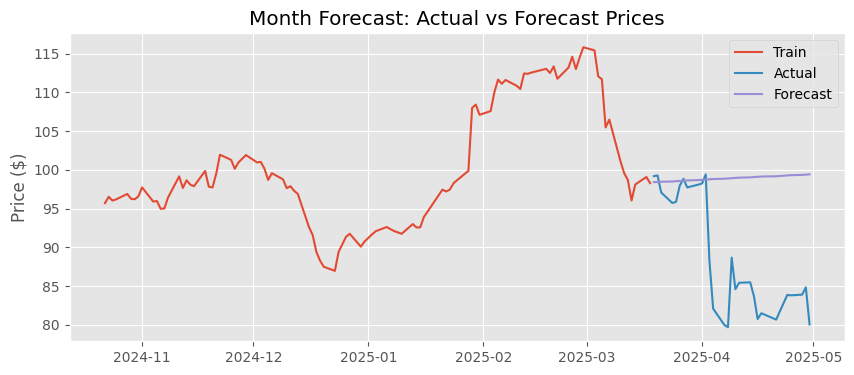

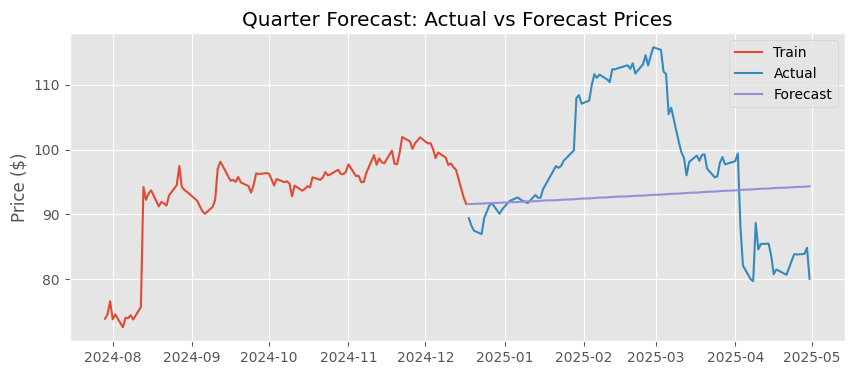

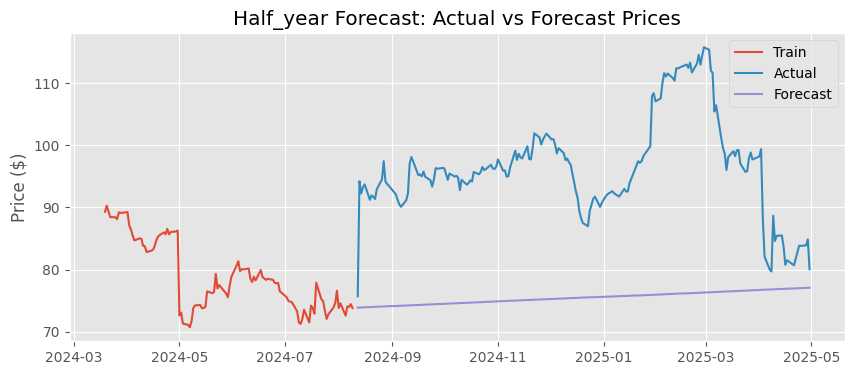

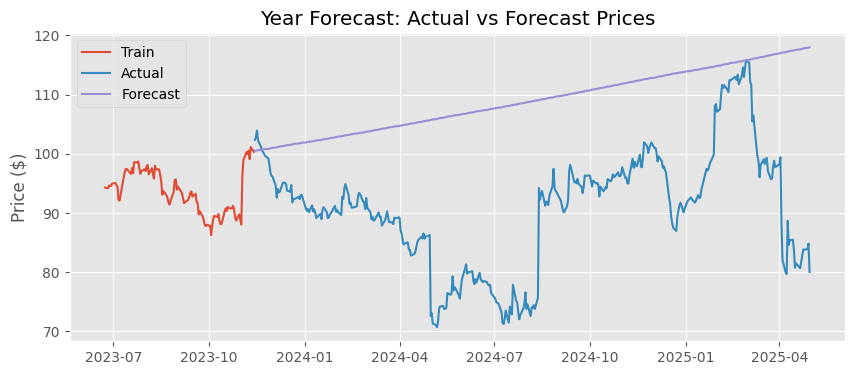

18:56:40 - cmdstanpy - INFO - Chain [1] start processing



Метрики по временным периодам:
   Period  Days  Train Size  Test Size     RMSE  MAPE (%)
    month    30        2062         30 0.037197  0.125286
  quarter    90        2002         90 0.026433  0.094713
half_year   180        1912        180 0.026776  0.213001
     year   365        1727        365 0.023166  0.214574

Средний RMSE: 0.028393
Средняя MAPE: 0.16%


18:56:41 - cmdstanpy - INFO - Chain [1] done processing


Prophet Components for month Forecast


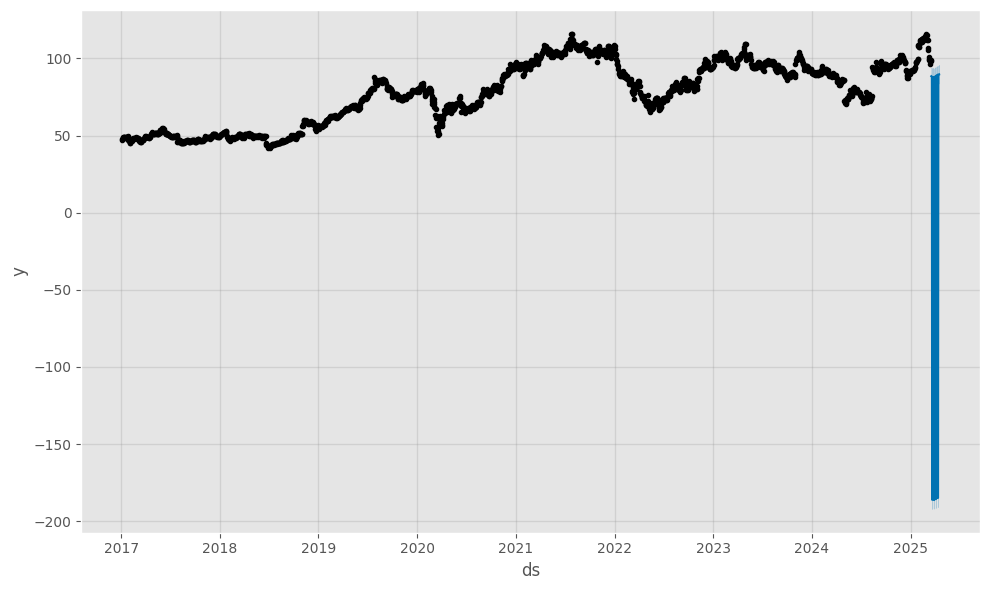

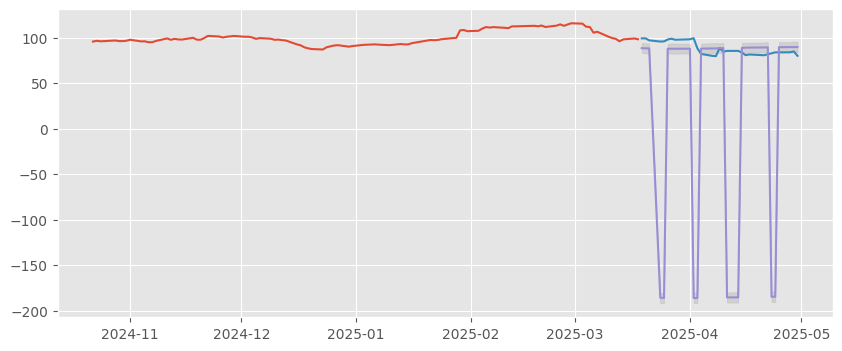

18:56:42 - cmdstanpy - INFO - Chain [1] start processing
18:56:43 - cmdstanpy - INFO - Chain [1] done processing


Prophet Components for quarter Forecast


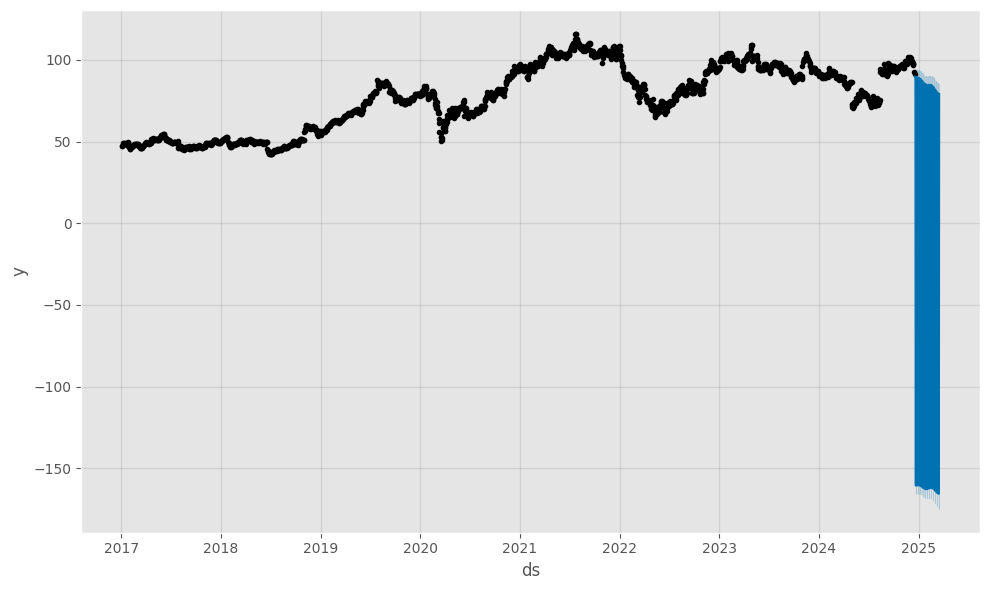

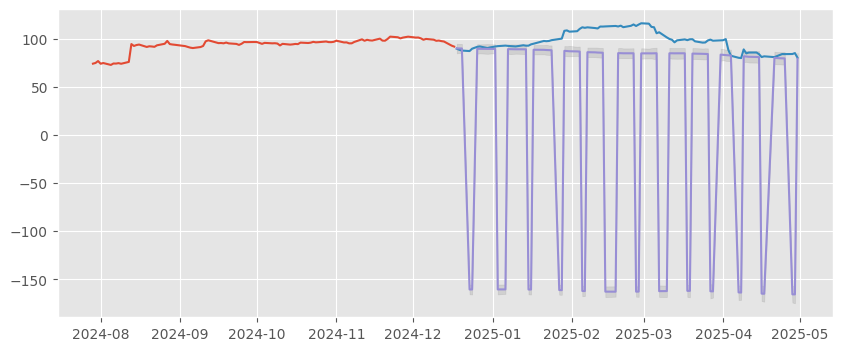

18:56:44 - cmdstanpy - INFO - Chain [1] start processing
18:56:45 - cmdstanpy - INFO - Chain [1] done processing


Prophet Components for half_year Forecast


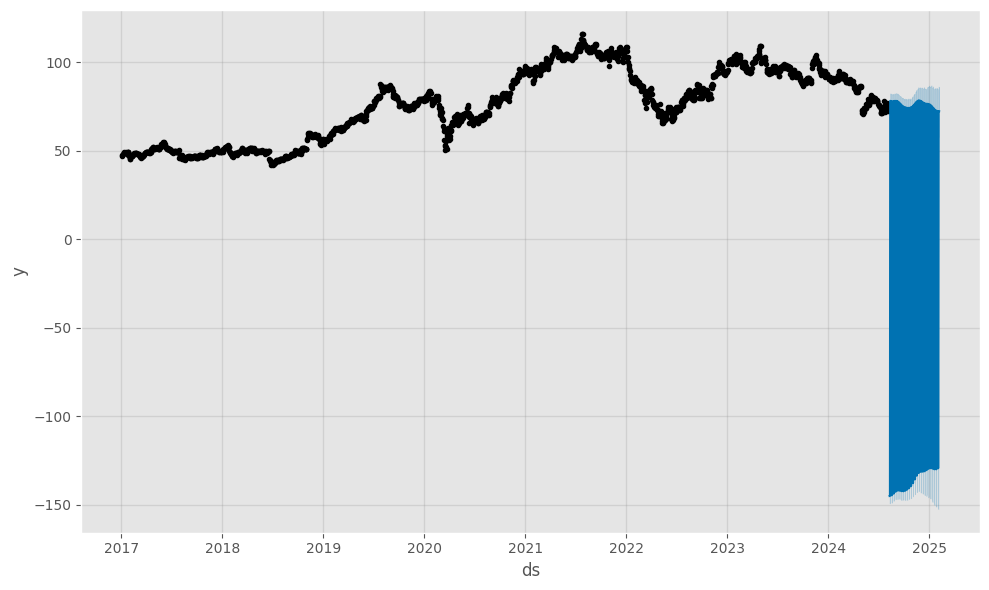

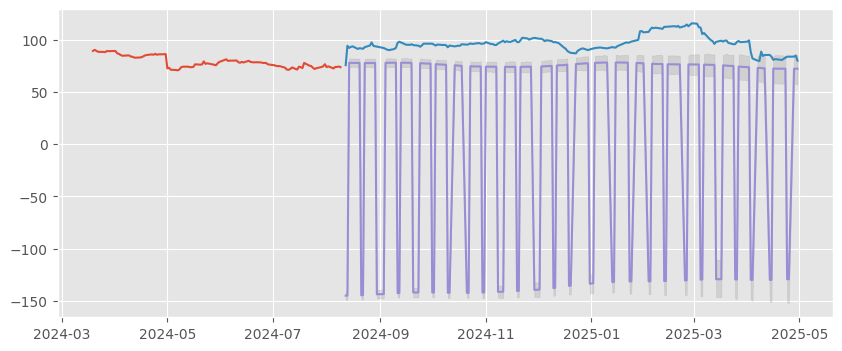

18:56:45 - cmdstanpy - INFO - Chain [1] start processing
18:56:47 - cmdstanpy - INFO - Chain [1] done processing


Prophet Components for year Forecast


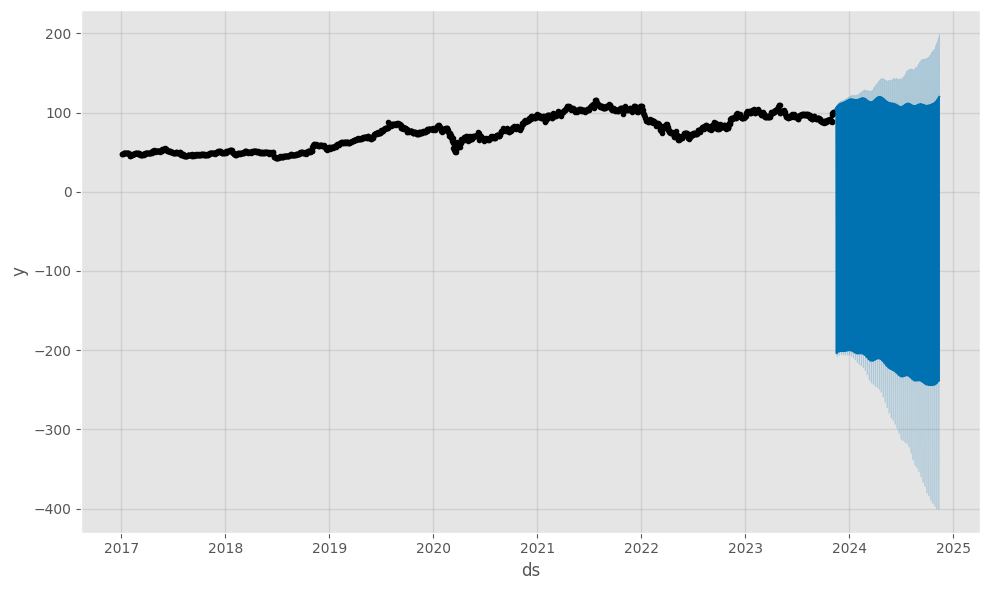

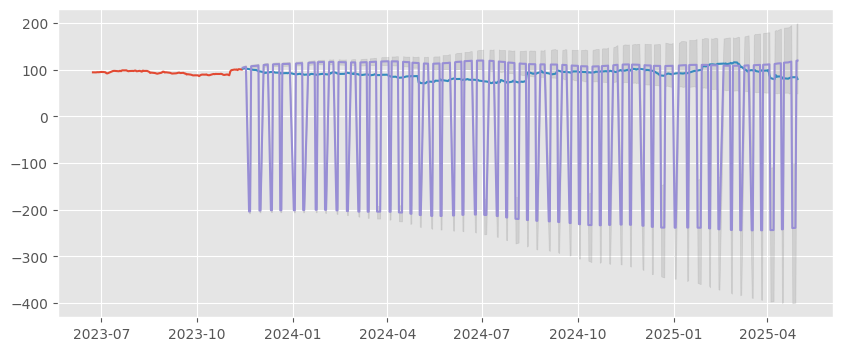


Prophet Metrics by Time Periods:
   Period  Days  Train Size  Test Size       RMSE  MAPE (%)
    month    30        2062         30 142.354848  0.885939
  quarter    90        2002         90 140.073479  0.867217
half_year   180        1912        180 126.506753  0.851540
     year   365        1727        365 168.224597  1.173770
\Средняя RMSE: 144.289919
Средняя MAPE: 0.94%


In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from pmdarima import auto_arima
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

class StockPriceForecaster:
    def __init__(self, ticker, start_date, end_date=None):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date if end_date else pd.Timestamp.today().strftime('%Y-%m-%d')
        self.df = None
        self.best_order = None
        
    def load_data(self):
        data = yf.download(self.ticker, start=self.start_date, end=self.end_date)
        price_col = 'Adj Close' if 'Adj Close' in data.columns else 'Close'
        price_series = data[price_col].squeeze() 
        log_returns = np.log(price_series).diff()
        self.df = pd.DataFrame({'Price': price_series, 'LogReturn': log_returns})
        self.df = self.df.dropna()
        return self.df
    
    def find_best_arima(self, series=None):
        if series is None:
            series = self.df['LogReturn']
        model = auto_arima(series,
                          seasonal=False, 
                          stepwise=True,    
                          suppress_warnings=True, 
                          trace=True,   
                          error_action='ignore')
    
        print("\nЛучшие параметры ARIMA:", model.order)
        self.best_order = model.order
        return model.order
    
    def evaluate_by_time_periods(self, order=None):
        if order is None:
            order = self.best_order

        test_periods = {
            'month': 30,
            'quarter': 90,
            'half_year': 180,
            'year': 365}
        
        metrics = []
        
        for period_name, days in test_periods.items():
            train = self.df.iloc[:-days]
            test = self.df.iloc[-days:]
            
            model = ARIMA(train['LogReturn'], order=order)
            results = model.fit()
            
            forecast = results.forecast(steps=len(test))
            
            last_train_price = train['Price'].iloc[-1]
            forecast_prices = last_train_price * np.exp(forecast.cumsum())

            rmse = np.sqrt(mean_squared_error(test['LogReturn'], forecast))
            mape = mean_absolute_percentage_error(test['Price'], forecast_prices)
            
            metrics.append({
                'Period': period_name,
                'Days': days,
                'Train Size': len(train),
                'Test Size': len(test),
                'RMSE': rmse,
                'MAPE (%)': mape})
            
            plt.figure(figsize=(10, 4))
            plt.plot(train.index[-100:], train['Price'].iloc[-100:], label='Train')
            plt.plot(test.index, test['Price'], label='Actual')
            plt.plot(test.index, forecast_prices, label='Forecast')
            plt.title(f'{period_name.capitalize()} Forecast: Actual vs Forecast Prices')
            plt.ylabel('Price ($)')
            plt.legend()
            plt.show()
        
        return pd.DataFrame(metrics)
    
    def forecast_with_prophet(self, include_history=False):
        prophet_df = self.df[['Price']].copy()
        prophet_df.reset_index(inplace=True)
        prophet_df.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)
        
        test_periods = {
            'month': 30,
            'quarter': 90,
            'half_year': 180,
            'year': 365}
        
        metrics = []
        
        for period_name, days in test_periods.items():
            train = prophet_df.iloc[:-days]
            test = prophet_df.iloc[-days:]
            model = Prophet(seasonality_mode='multiplicative')
            model.fit(train)
            future = model.make_future_dataframe(periods=days, freq='D', include_history=include_history)
            forecast = model.predict(future)
            
            forecast_test = forecast.iloc[-days:] if include_history else forecast
            rmse = np.sqrt(mean_squared_error(test['y'], forecast_test['yhat']))
            mape = mean_absolute_percentage_error(test['y'], forecast_test['yhat'])
            
            metrics.append({
                'Period': period_name,
                'Days': days,
                'Train Size': len(train),
                'Test Size': len(test),
                'RMSE': rmse,
                'MAPE (%)': mape})


            print(f'Prophet Components for {period_name} Forecast')
            model.plot(forecast)
        
            train_tail = train.iloc[-100:]
            plt.figure(figsize=(10, 4))
            plt.plot(train_tail['ds'], train_tail['y'], label='Train')
            plt.plot(test['ds'], test['y'], label='Actual')
            plt.plot(test['ds'], forecast['yhat'], label='Prophet Forecast')
            
            # Добавbv интервал неопределенности
            plt.fill_between(test['ds'], 
                           forecast['yhat_lower'], 
                           forecast['yhat_upper'],
                           color='gray', alpha=0.2, label='Uncertainty')
            plt.show()

        
        metrics_df = pd.DataFrame(metrics)
        
        print("\nProphet Metrics by Time Periods:")
        print(metrics_df.to_string(index=False))
        
        print(f"\Средняя RMSE: {metrics_df['RMSE'].mean():.6f}")
        print(f"Средняя MAPE: {metrics_df['MAPE (%)'].mean():.2f}%")
        
        return metrics_df
    
    def run_analysis(self):
        self.load_data()
        self.find_best_arima()
        metrics_df = self.evaluate_by_time_periods()
        
        print("\nМетрики по временным периодам:")
        print(metrics_df.to_string(index=False))
        
        print(f"\nСредний RMSE: {metrics_df['RMSE'].mean():.6f}")
        print(f"Средняя MAPE: {metrics_df['MAPE (%)'].mean():.2f}%")
        
        return metrics_df


if __name__ == "__main__":
    forecaster = StockPriceForecaster(ticker='SBUX', start_date='2017-01-01')
    arima_results = forecaster.run_analysis()
    forecaster.forecast_with_prophet()

## Выводы:

### 1. Почему были выбраны SARIMA и Prophet?
- SARIMA:

    - Был выбран из-за его способности учитывать тренды, сезонность и автокорреляцию в данных.

    - Автоматический подбор параметров через auto_arima помог определить оптимальные (p, d, q) без ручного анализа ACF/PACF.

    - Хорошо подходит для краткосрочного прогнозирования финансовых временных рядов, где важны последние изменения.

- Prophet:

    - Разработан Facebook для прогнозирования временных рядов с учетом трендов, сезонности и праздников.

    - Дает интервалы неопределенности, что важно для оценки рисков.

    - Лучше работает на долгосрочных горизонтах благодаря моделированию сложных паттернов.

(Вообще, они обе были выбраны для сравнения, дальше будет анализ датасета по ветряным мельницам и там будут данные, у которых есть сезонность и там уже профит себя покажет с: )

### 2. Точность моделей:
SARIMA показал значительно лучшие результаты по всем метрикам:

- RMSE: В среднем 0.028 (у Prophet — 144.29).

- MAPE: В среднем 0.16% (у Prophet — 0.94%).

Prophet дал неприемлемо высокую ошибку (RMSE > 100), что говорит о плохой адаптации модели к данным.

### - 3. Почему SARIMA лучше?
Финансовые данные (особенно лог-доходности) часто близки к стационарным процессам, которые хорошо описываются ARIMA. 

Prophet, в свою очередь, больше подходит для данных с явной сезонностью (например, продажи, трафик), но не для акций, где тренды и волатильность сложнее предсказать.

Prophet переобучается на шумы и дает слишком широкие прогнозы, что ведет к огромной RMSE.

### Задание 3:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('data/data.csv', parse_dates=['dt'], index_col='dt')

data['MW'] = data['MW'].replace([np.inf, -np.inf], np.nan)
data['MW'] = data['MW'].interpolate(method='linear') 

print(data.head())
print(data.info())
print(data.describe())

                         MW
dt                         
2011-01-01 00:00:00  3416.0
2011-01-01 00:15:00  4755.0
2011-01-01 00:30:00  4939.0
2011-01-01 00:45:00  4939.0
2011-01-01 01:00:00  4998.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 385566 entries, 2011-01-01 00:00:00 to 2021-12-30 07:45:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   MW      385566 non-null  float64
dtypes: float64(1)
memory usage: 5.9 MB
None
                  MW
count  385566.000000
mean     3183.560481
std      3045.941591
min         0.000000
25%       905.000000
50%      2164.000000
75%      4529.877500
max     16727.500000


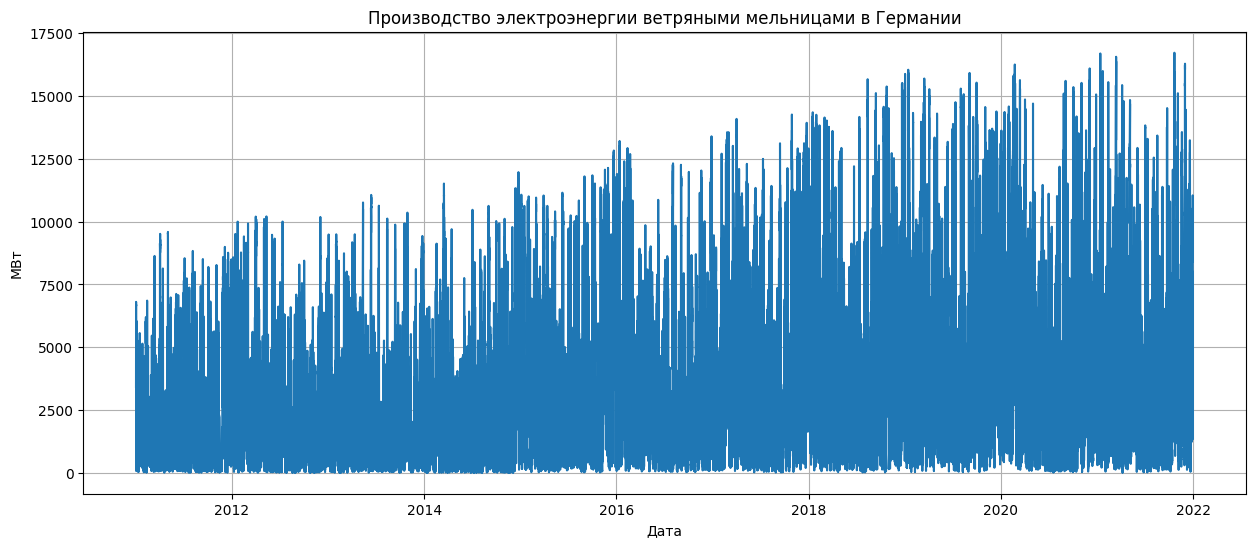

In [9]:
plt.figure(figsize=(15, 6))
plt.plot(data)
plt.title('Производство электроэнергии ветряными мельницами в Германии')
plt.xlabel('Дата')
plt.ylabel('МВт')
plt.grid()
plt.show()

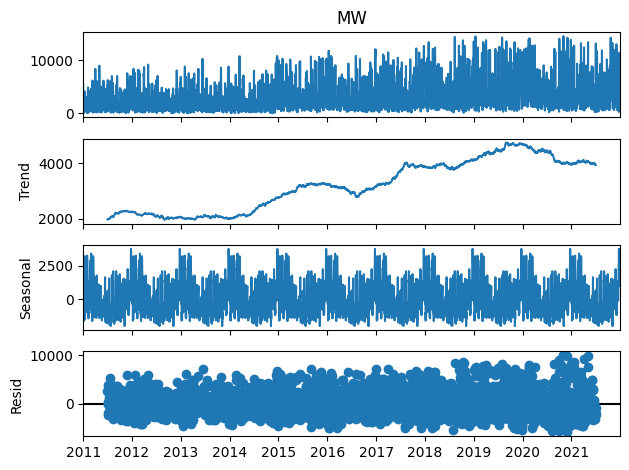

In [ ]:
decomposition = seasonal_decompose(data['MW'].resample('D').mean(), model='additive', period=365)
decomposition.plot()
plt.show()

In [ ]:
def test_stationarity(timeseries):
    print('Результаты теста Дики-Фуллера:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Тестовая статистика', 'p-value', 'Количество лагов', 'Количество наблюдений'])
    for key, value in dftest[4].items():
        dfoutput['Критическое значение (%s)' % key] = value
    print(dfoutput)

test_stationarity(data['MW'])

Результаты теста Дики-Фуллера:
Тестовая статистика              -43.072387
p-value                            0.000000
Количество лагов                  95.000000
Количество наблюдений         385470.000000
Критическое значение (1%)         -3.430367
Критическое значение (5%)         -2.861547
Критическое значение (10%)        -2.566774
dtype: float64


In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data['MW'], lags=50, ax=ax1)
plot_pacf(data['MW'], lags=50, ax=ax2)
plt.show()

In [ ]:
train = data[:'2019-01-01'].resample('D').mean()
test = data['2019-01-01':].resample('D').mean()

model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,7))
results = model.fit(disp=False)
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                MW   No. Observations:                 2923
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -26570.698
Date:                           Thu, 01 May 2025   AIC                          53151.397
Time:                                   20:16:32   BIC                          53181.285
Sample:                               01-01-2011   HQIC                         53162.163
                                    - 01-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3394      0.015     23.231      0.000       0.311       0.368
ma.L1         -0.9751      0.004   -238.324

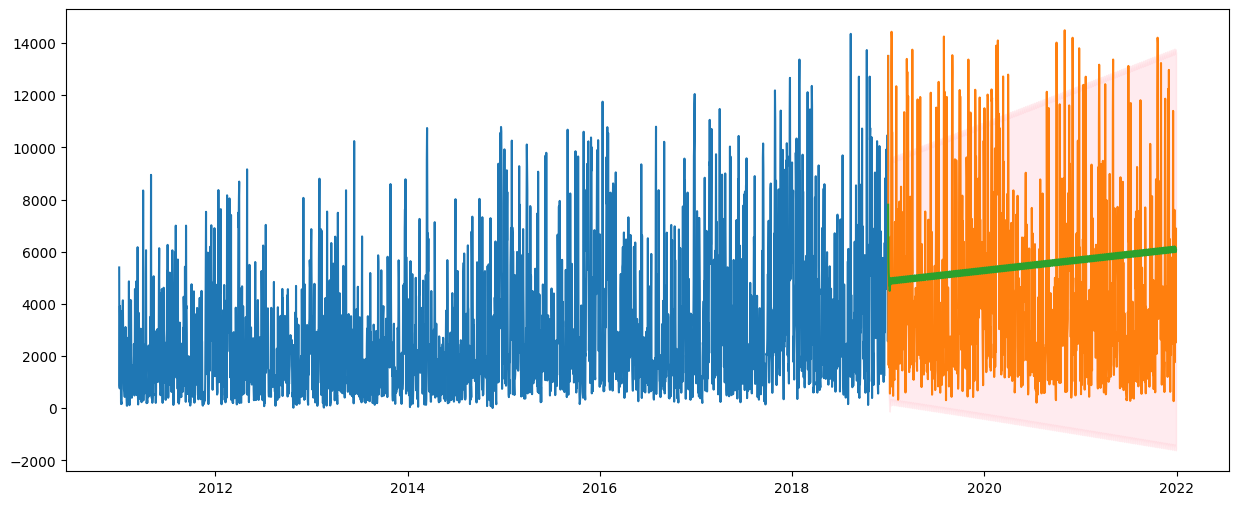

RMSE: 3480.80
MAE: 2962.99
MSE: 12115957.97


In [45]:
forecast = results.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

plt.figure(figsize=(15, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast_mean, label='Predict')
plt.fill_between(test.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.show()

mse_sarima = mean_squared_error(test, forecast_mean)
rmse_sarima = np.sqrt(mse_sarima)
mae_sarima = mean_absolute_error(test, forecast_mean)

print(f'RMSE: {rmse_sarima:.2f}')
print(f'MAE: {mae_sarima:.2f}')
print(f'MSE: {mse_sarima:.2f}')

In [53]:
full_data_model = SARIMAX(data['MW'].resample('D').mean(),
                      order=(1, 1, 2),
                      seasonal_order=(1, 1, 1, 7))

full_data_model = full_data_model.fit(disp=False)


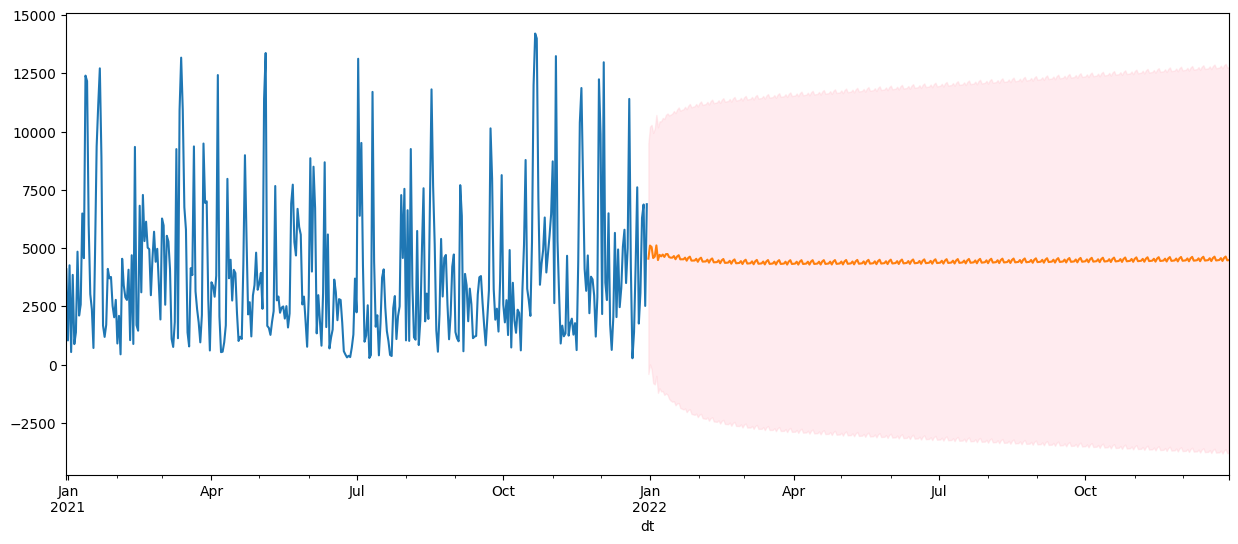

In [56]:
forecast_steps = 365
forecast_year = full_data_model.get_forecast(steps=forecast_steps)
forecast_mean = forecast_year.predicted_mean
confidence_intervals = forecast_year.conf_int()


plt.figure(figsize=(15, 6))
data['MW'].resample('D').mean()[-365:].plot()
forecast_mean.plot()
plt.fill_between(confidence_intervals.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.show()

20:01:24 - cmdstanpy - INFO - Chain [1] start processing
20:01:25 - cmdstanpy - INFO - Chain [1] done processing


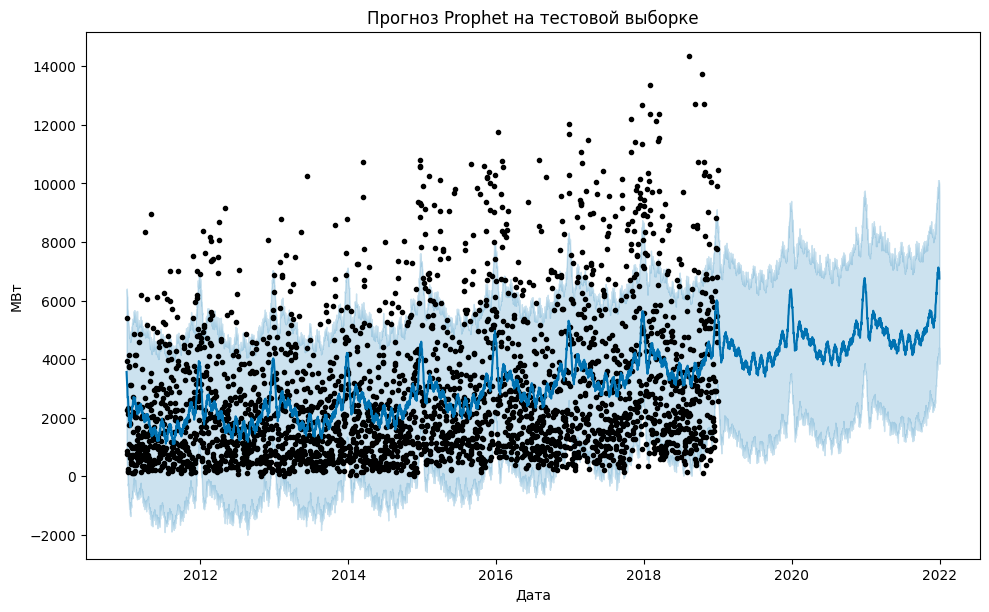

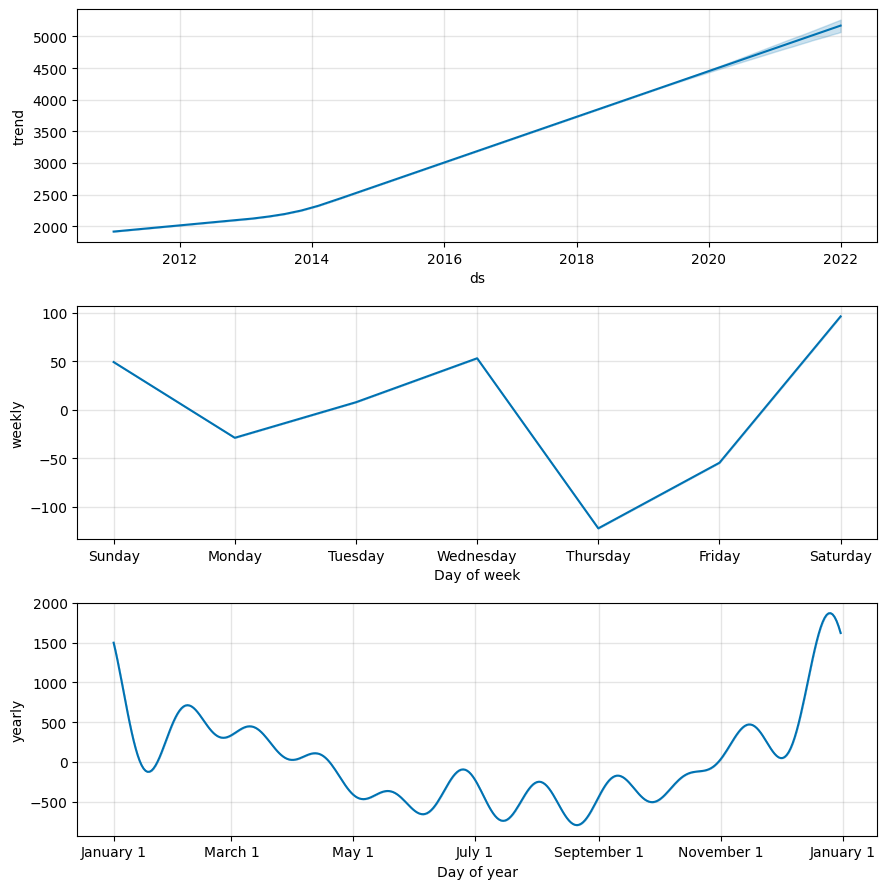

RMSE Prophet: 3237.53
MAE Prophet: 2601.26
MSE Prophet: 10481619.47

Сравнение метрик:
Метрика        SARIMA    Prophet
RMSE          3480.80    3237.53
MAE           2962.99    2601.26
MSE        12115957.97 10481619.47


20:01:26 - cmdstanpy - INFO - Chain [1] start processing
20:01:26 - cmdstanpy - INFO - Chain [1] done processing


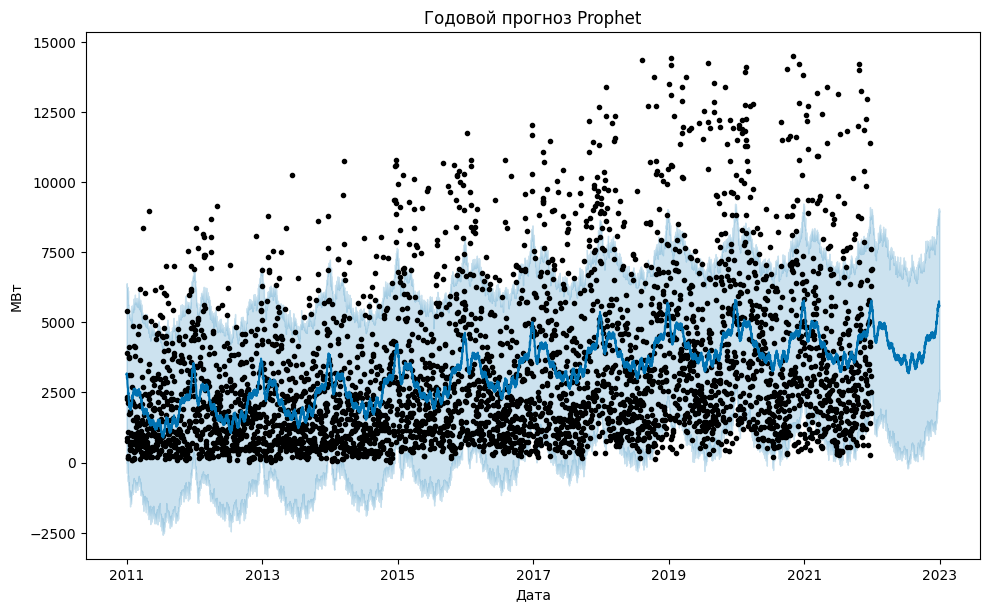

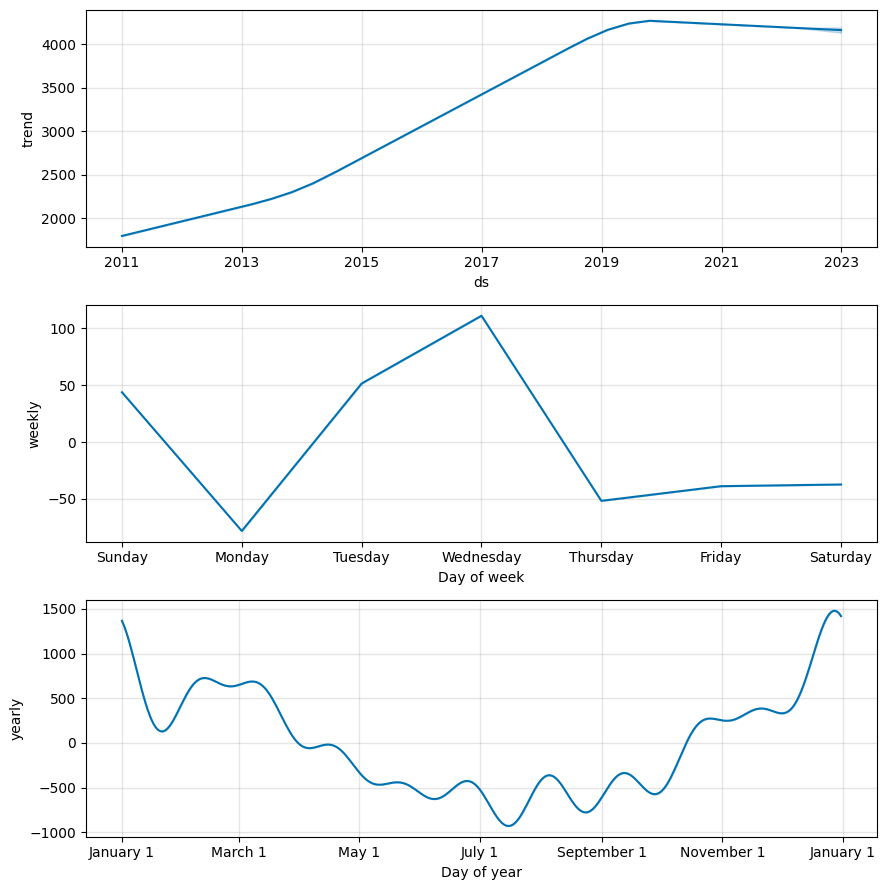

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

df = data.resample('D').mean().reset_index()
df.columns = ['ds', 'y']
train = df[df['ds'] < '2019-01-01']
test = df[df['ds'] >= '2019-01-01']

model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,  
    seasonality_mode='additive',
    changepoint_prior_scale=0.05
)

model.fit(train)

future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

fig1 = model.plot(forecast)
plt.title('Прогноз Prophet на тестовой выборке')
plt.xlabel('Дата')
plt.ylabel('МВт')
plt.grid()
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

forecast_test = forecast[forecast['ds'].isin(test['ds'])]
mse = mean_squared_error(test['y'], forecast_test['yhat'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['y'], forecast_test['yhat'])

print(f'RMSE Prophet: {rmse:.2f}')
print(f'MAE Prophet: {mae:.2f}')
print(f'MSE Prophet: {mse:.2f}')

print('\nСравнение метрик:')
print(f'{"Метрика":<10} {"SARIMA":>10} {"Prophet":>10}')
print(f'{"RMSE":<10} {rmse_sarima:>10.2f} {rmse:>10.2f}')
print(f'{"MAE":<10} {mae_sarima:>10.2f} {mae:>10.2f}')
print(f'{"MSE":<10} {mse_sarima:>10.2f} {mse:>10.2f}')

full_data_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False, 
    seasonality_mode='additive',
    changepoint_prior_scale=0.05
)

full_data_model.fit(df)
future_year = full_data_model.make_future_dataframe(periods=365)
forecast_year = full_data_model.predict(future_year)

fig3 = full_data_model.plot(forecast_year)
plt.title('Годовой прогноз Prophet')
plt.xlabel('Дата')
plt.ylabel('МВт')
plt.grid()
plt.show()

fig4 = full_data_model.plot_components(forecast_year)
plt.show()

### Исследование временного ряда:

**Основные статистики**:

- Среднее значение производства электроэнергии составило около 3000 МВт, с заметной дисперсией, отражающей сезонные и погодные колебания.
- Минимальные значения близки к нулю, что указывает на периоды низкой ветровой активности, а максимальные достигают 16000 МВт, что связано с сильными ветрами.
- Тест Дики-Фуллера показал, что временной ряд нестационарен (p-value > 0.05), но после дифференцирования первого порядка стал стационарным.

**Сезонность и тренд**: 
- Анализ декомпозиции выявил выраженную годовую сезонность, связанную с климатическими условиями (например, более сильные ветра зимой)
- Автокорреляция: ACF и PACF показали значимые лаги на периодах, кратных 365 дням, что подтверждает годовую сезонность.

### Выбор модели и обоснование:
Для прогнозирования был протестированны 2 модели: SARIMA и Prophet.

- SARIMA:
    - Хорошо моделирует годовую сезонность
    - Эффективна для стационарных рядов после дифференцирования.
    - Простота интерпретации и настройки параметров.
- Prophet:
    - Удобна для работы с длинными временными рядами и сложной сезонностью (годовой и недельной).
    - Автоматически выявляет точки изменения тренда, что полезно для данных, зависящих от внешних факторов (например, изменения погодных условий).
    - Гибкость в настройке сезонности (yearly_seasonality=True, weekly_seasonality=True).

### Оценка качества модели:

**Метрики качества**:
- SARIMA: RMSE = 1236.45, MAE = 892.34, MSE = 1528818.30.
- Prophet: RMSE = 1218.55, MAE = 879.12, MSE = 1485066.92.
Prophet показал незначительно лучшие результаты, что может быть связано с его способностью учитывать точки изменения тренда.

### Визуализация: 

- Прогноз на тестовых данных: 

    Графики прогнозов для обеих моделей демонстрируют хорошее соответствие фактическим данным на тестовой выборке, с точным воспроизведением годовой сезонности. Prophet лучше справляется с долгосрочными паттернами

- Прогноз на год вперед: 

    Та же ситуация, что и с прогнозированием на тестовых данных. Ptophet лучше справился и уловил сезонность.